### 2.0. Imports

In [237]:
# Importing several libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 4.0) #setting figure size
import seaborn as sns
import matplotlib.dates as mdates
import os
import emoji
import re
pd.set_option('display.float_format', '{:.2f}'.format) # Set the float display option

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /Users/lgfolder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [238]:
DATAFILE = '../data/reddit_cleaned.csv'
df_all = pd.read_csv(DATAFILE)
# df = df_all.copy().head(2000) #, random_state=99)
df = df_all.copy()

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416936 entries, 0 to 1416935
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id                   1416936 non-null  object 
 1   author               1416936 non-null  object 
 2   created              1416936 non-null  object 
 3   removed              1416936 non-null  int64  
 4   deleted              1416936 non-null  int64  
 5   is_self              1416936 non-null  int64  
 6   is_video             1416936 non-null  int64  
 7   title                1416931 non-null  object 
 8   link_flair_text      1416936 non-null  object 
 9   upvote_ratio         1416936 non-null  float64
 10  score                1416936 non-null  int64  
 11  gilded               1416936 non-null  int64  
 12  num_comments         1416936 non-null  int64  
 13  selftext             982253 non-null   object 
 14  shortlink            1416936 non-null  object 
 15

In [240]:
# Check data quality
print(f"Missing value: {df.isna().sum().sum()}")
print(f"Duplicated rows: {df.duplicated().sum().sum()}")

Missing value: 434688
Duplicated rows: 0


In [241]:
# Check class counts
df['selftext'].value_counts() 
# df.value_counts()

selftext
[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### 2.x. Removing moderators ??? 

### 2.x. Spam messages - shall I remove them? 

### 2.x. TextBlob sentiment score

### 2.X. VADER sentiment score calculation 

In [242]:
# Instantiate an object of SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def calculate_sentiment(text):
    if pd.isnull(text):
        return {'neg': None, 'neu': None, 'pos': None, 'compound': None}
    
    # Analyze the sentiment of the post
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score


In [243]:
# This code checks the content of each inidividual text cell 
i = 1
print(df["selftext"].loc[i])
post = df["selftext"].loc[i]

# Calculates the sentiment scores for the chosen cell
overall_sentiment_score = analyzer.polarity_scores(post)
print(overall_sentiment_score)

Stop spamming copy pastes you boomers. Instabans being handed out.
{'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'compound': -0.6486}


In [244]:
# Apply the calculate_sentiment function to each row in the 'selftext' column
df[['neg', 'neu', 'pos', 'compound']] = df['selftext'].apply(calculate_sentiment).apply(pd.Series)

# Apply the calculate_sentiment function to each row in the 'title' column
df[['neg_t', 'neu_t', 'pos_t', 'compound_t']] = df['title'].apply(calculate_sentiment).apply(pd.Series)

### 2.x. Check the distribution of average VADER sentiment scores over time

<Axes: xlabel='date'>

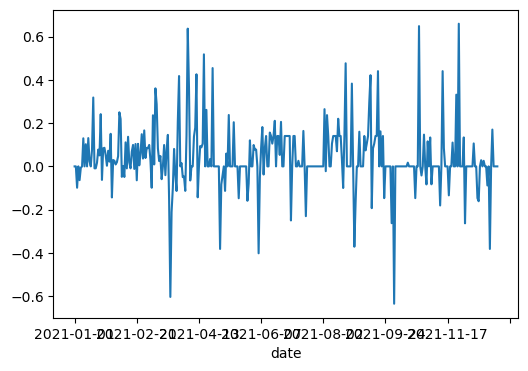

In [ ]:
# Group by the 'Date' column and calculate the average of the 'compound' column
df_compound_by_date = df.groupby('date')['compound_t'].mean()

# Display the result
df_compound_by_date
df_compound_by_date.plot.line()

### 2.x. Plotting trends in usage of emojis over time

<Axes: xlabel='date'>

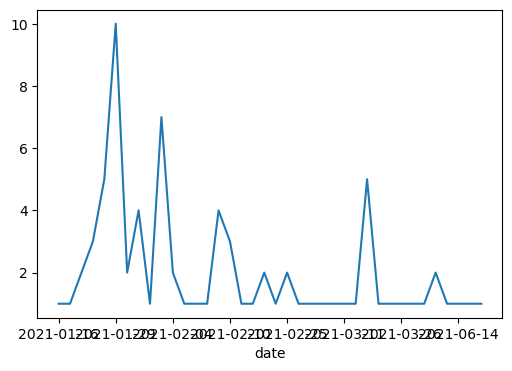

In [ ]:
# Filter the DataFrame for rows where 'selftext' contains the specified phrase
filtered_df = df[df['selftext'].str.contains("🚀", na=False, regex=True)]
filtered_df

# Group by the 'Date' column and sum specific numerical columns
df_rockets_by_date = filtered_df.groupby('date')['id'].count()
df_rockets_by_date

# Display the result
df_rockets_by_date.plot.line()

### 2.x. 

In [ ]:
df

,id,author,created,removed,deleted,is_self,is_video,title,link_flair_text,upvote_ratio,...,word_count_title,date,neg,neu,pos,compound,neg_t,neu_t,pos_t,compound_t
0,l6ea1b,AutoModerator,2021-01-27 21:00:11,0,0,1,0,"What Are Your Moves Tomorrow, January 28, 2021",Daily Discussion,0.94,...,8,2021-01-27,0.02,0.55,0.43,1.00,0.00,1.00,0.00,0.00
1,l6er79,grebfar,2021-01-27 21:26:35,0,0,1,0,The GME Afterhours Thread: Part 4.20 on 27 Jan...,Mods,0.96,...,9,2021-01-27,0.40,0.60,0.00,-0.65,0.00,1.00,0.00,0.00
2,l2ljpt,grebfar,2021-01-22 11:07:41,0,0,1,0,GMREEEEEEEEEEEE Containment Thread - GME shitp...,Mods,0.87,...,8,2021-01-22,0.12,0.88,0.00,-0.54,0.00,1.00,0.00,0.00
3,l4lmrx,Dan_inKuwait,2021-01-25 10:56:35,0,0,1,0,"GME Thoughts, YOLOs, Gains, Stonk Updates, 🚀🚀🚀...",Discussion,0.87,...,14,2021-01-25,0.05,0.84,0.11,0.47,0.00,0.86,0.14,0.34
4,l5c0nr,zjz,2021-01-26 11:16:56,0,0,1,0,"The GME Thread Part 1 for January 26, 2021",Daily Discussion,0.91,...,9,2021-01-26,0.09,0.78,0.13,0.53,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,kpeffw,Jq4000,2021-01-03 05:19:22,0,0,1,0,Reasons We May Not Be in a Bubble,none,0.96,...,8,2021-01-03,0.02,0.86,0.11,0.97,0.00,1.00,0.00,0.00
1996,krkyos,AutoModerator,2021-01-06 10:00:17,0,0,1,0,"Daily FI discussion thread - Wednesday, Januar...",none,0.92,...,9,2021-01-06,0.00,0.88,0.12,0.90,0.00,1.00,0.00,0.00
1997,l9zsc2,AutoModerator,2021-02-01 10:00:14,0,0,1,0,"Daily FI discussion thread - Monday, February ...",none,0.88,...,9,2021-02-01,0.00,0.88,0.12,0.90,0.00,1.00,0.00,0.00
1998,lycp9b,OPINION_IS_UNPOPULAR,2021-03-05 14:15:15,0,0,1,0,"PLTR Megathread for March 05, 2021",none,0.75,...,6,2021-03-05,0.04,0.82,0.14,0.90,0.00,1.00,0.00,0.00


### 2. Using regex for extracting ticker from the text

In [ ]:
# Modified code (need source forgot where it came from )

import re
import pandas as pd

# Function to find all occurrences of the stock ticker in the text blob
def find_occurrences_of_stock_ticker(arg_ticker, arg_text_to_search):
    # Case-insensitive search for the ticker and ticker prefixed with a '$'
    reg_ex_count = sum(1 for match in re.finditer(r'\b({}|${})\b'.format(arg_ticker, arg_ticker), 
                                                  arg_text_to_search, re.IGNORECASE))
    return reg_ex_count

# Load your tickers list from the CSV file
tickers_df = pd.read_csv('../data/tickers_list.csv')

# Assume df is your dataframe with a column 'selftext' containing the comments/posts
# Convert the 'selftext' to string to ensure that there are no floats
df['selftext'] = df['selftext'].astype(str)

# Create a text blob from all the comments/posts
text_blob = ' '.join(df['selftext'])

# Create a dictionary to hold the count of occurrences for each ticker
dictionary = {}

# Go through each ticker and count its occurrences in the text blob
for index, row in tickers_df.iterrows():
    ticker = row['Ticker']
    occurrences = find_occurrences_of_stock_ticker(ticker, text_blob)
    if occurrences > 0:
        dictionary[ticker] = occurrences

# Now you can sort the dictionary by occurrences and do further analysis
# For example, you can convert it to a DataFrame
ticker_counts_df = pd.DataFrame(list(dictionary.items()), columns=['Ticker', 'Occurrences']).sort_values(by='Occurrences', ascending=False)

# If you want to add this as a column to your original df, we can map the counts back to each comment
# We will create a function that maps the occurrences to each comment

def map_ticker_occurrences(comment, ticker_counts):
    tickers_in_comment = []
    for ticker, count in ticker_counts.items():
        if ticker in comment.upper():  # Converting to upper case for case-insensitive comparison
            tickers_in_comment.append(ticker)
    return tickers_in_comment

# Map the ticker occurrences back to the original DataFrame
df['tickers_mentioned'] = df['selftext'].apply(lambda comment: map_ticker_occurrences(comment, dictionary))

# Display the DataFrame with ticker counts
print(ticker_counts_df)

# Display the DataFrame with tickers mentioned in each comment
print(df[['selftext', 'tickers_mentioned']])

  Ticker  Occurrences
0    GME         1456
3    AMC          186
1   TSLA           34
2   AAPL           20
4   MSFT            8
6   AMZN            3
5   NVDA            2
                                               selftext tickers_mentioned
0     Your daily trading discussion thread. Please k...                []
1     Stop spamming copy pastes you boomers. Instaba...                []
2     Don't be doxxing citron or anyone else. That's...                []
3     Thanks all for the quick rise to max comments ...             [GME]
4     Good luck today. [Here's some WSB stats.](http...                []
...                                                 ...               ...
1995  I'm seeing a lot of posts comparing this to th...            [TSLA]
1996  Please  use this thread to have discussions wh...                []
1997  Please  use this thread to have discussions wh...                []
1998  This thread will remain unstickied today. Hope...                []
1999      

In [ ]:
df.

,878,1792,1777,1346
id,l87hhd,lw5fn3,ox1zi7,l7qwh6
author,kds0321,LookAtMeImAName,VisualMod,aBetterNation
created,2021-01-29 23:18:04,2021-03-02 16:04:46,2021-08-03 12:01:02,2021-01-29 12:03:54
removed,0,0,0,0
deleted,0,0,0,0
is_self,1,1,1,0
is_video,0,0,0,0
title,"GME gang, remember to give back. Tomorrow I'm ...",Serious Question: If 99% of first-time day tra...,"Daily Popular Tickers Thread for August 03, 20...",Just YOLO’d 200k on GME PREMARKET
link_flair_text,Discussion,none,none,YOLO
upvote_ratio,0.92,0.90,0.92,0.98


### 3.1. Ticker list selection
this code was adapted from here: https://github.com/theriley106/TheWSBIndex/tree/master

In [ ]:
# The original code written from pseudocode

import pandas as pd
import re

# Read the stock tickers and company names from a CSV file into a DataFrame
tickers_df = pd.read_csv('../data/tickers_list.csv')

# Create a dictionary to map both tickers and company names to their official ticker symbols
# Mapping is done by converting everything to uppercase to ensure case-insensitive matching
# It also handles NaN values by checking if the entries are not null
ticker_name_map = {
    str(row['Ticker']).upper(): row['Ticker'] 
    for _, row in tickers_df.iterrows() if pd.notnull(row['Ticker'])
}
ticker_name_map.update({
    str(row['Name']).upper(): row['Ticker'] 
    for _, row in tickers_df.iterrows() if pd.notnull(row['Name'])
})

# Define the process_comment function that will take a comment string and return a dictionary
# containing categorized tickers based on the action words found in the comment
def process_comment(comment):
    # If comment is not a string (e.g., NaN), return an empty dictionary
    if not isinstance(comment, str):
        return {'puts': [], 'calls': [], 'buy': [], 'sell': []}

    # Initialize a dictionary to store categorized tickers
    comment_info = {'puts': [], 'calls': [], 'buy': [], 'sell': []}

    # Convert the entire comment to uppercase to match against the ticker_name_map
    comment_upper = comment.upper()
    
    # Use regex to find all words in the comment
    words = re.findall(r'\b\w+\b', comment_upper)

    # Initialize an empty list to temporarily store tickers as we find them
    tempList = []

    # Iterate through each word in the comment
    for word in words:
        # Check if the word is a ticker or company name, adjusting for $ prefix and matching against the map
        if word in ticker_name_map or word.strip('$') in ticker_name_map:
            # If it is, add the official ticker symbol to tempList
            ticker = ticker_name_map.get(word, ticker_name_map.get(word.strip('$'), ''))
            tempList.append(ticker)
        # Check for buying action words and update the comment_info dictionary
        elif word in ['BUY', 'BUYING']:
            comment_info['buy'].extend(tempList)
            tempList.clear()
        # Check for selling action words and update the comment_info dictionary
        elif word in ['SELL', 'SOLD', 'CLOSE', 'CLOSING', 'SHORTS']:
            comment_info['sell'].extend(tempList)
            tempList.clear()
        # Check for 'puts' and 'calls' action words and update the comment_info dictionary
        elif word == 'PUTS' and tempList:
            comment_info['puts'].extend(tempList)
            tempList.clear()
        elif word == 'CALLS' and tempList:
            comment_info['calls'].extend(tempList)
            tempList.clear()

    # Handle any remaining tickers that haven't been categorized
    if tempList:
        # By default, we add any uncategorized tickers to the 'buy' category
        # Modify as needed based on your logic or requirements
        comment_info['buy'].extend(tempList)

    # Return the populated dictionary for this comment
    return comment_info

# Fill NaN values with an empty string before applying the process_comment function
df['selftext'] = df['selftext'].fillna('')
df['comment_info'] = df['selftext'].apply(process_comment)

# Apply the process_comment function only to non-null rows in the 'selftext' column
# If 'selftext' is NaN, the corresponding 'comment_info' will be an empty dictionary
df['comment_info'] = df['selftext'].dropna().apply(process_comment)

# Optionally, if you want to create separate columns for each action
# Expand the dictionaries in 'comment_info' into separate columns
df[['puts', 'calls', 'buy', 'sell']] = df['comment_info'].apply(pd.Series)

# Display the DataFrame to verify the output
print(df[['selftext', 'puts', 'calls', 'buy', 'sell']])

                                               selftext puts calls     buy  \
0     Your daily trading discussion thread. Please k...   []    []      []   
1     Stop spamming copy pastes you boomers. Instaba...   []    []      []   
2     Don't be doxxing citron or anyone else. That's...   []    []      []   
3     Thanks all for the quick rise to max comments ...   []    []      []   
4     Good luck today. [Here's some WSB stats.](http...   []    []      []   
...                                                 ...  ...   ...     ...   
1995  I'm seeing a lot of posts comparing this to th...   []    []  [TSLA]   
1996  Please  use this thread to have discussions wh...   []    []      []   
1997  Please  use this thread to have discussions wh...   []    []      []   
1998  This thread will remain unstickied today. Hope...   []    []      []   
1999                                                nan   []    []      []   

     sell  
0      []  
1      []  
2      []  
3      []  
4  

In [ ]:
df['buy'].value_counts(normalize=True).head(20)

buy
[]                                                                            0.88
[GME]                                                                         0.03
[GME, GME]                                                                    0.02
[GME, GME, GME]                                                               0.01
[GME, GME, GME, GME]                                                          0.01
[GME, GME, GME, GME, GME, GME]                                                0.00
[TSLA]                                                                        0.00
[AAPL, AAPL]                                                                  0.00
[GME, GME, GME, GME, GME, GME, GME, GME]                                      0.00
[GME, AMC]                                                                    0.00
[GME, GME, GME, GME, GME]                                                     0.00
[GME, AMC, GME]                                                               0.00


In [ ]:
df['buy'].value_counts(bins=3)

TypeError: bins argument only works with numeric data.

In [ ]:
# code to extract stock ticker mentions from the social media posts 

import pandas as pd
import re

# Sample text containing stock mentions
text = "I just bought $GME and $AAPL, and I'm considering $AMZN as well. $gme is on fire! GME, Gamestop, gamestop, GameStop, gme."

# Sample list of publicly traded tickers
ticker_data = {
    'Ticker': ['$GME', '$AAPL', '$AMZN', '$TSLA'],
    'Company': ['GameStop Inc.', 'Apple Inc.', 'Amazon.com Inc.', 'Tesla, Inc.']
}

# Create a DataFrame from the ticker data
ticker_df = pd.DataFrame(ticker_data)

# Define a regular expression pattern to find stock mentions
pattern = r'\$?(?i)\b(' + '|'.join(map(re.escape, ticker_df['Ticker'])) + r')\b'

# Find all stock mentions in the text
mentions = re.findall(pattern, text)

# Remove duplicate mentions
unique_mentions = list(set(mentions))

# Create a dictionary to store the mentions and associated companies
mentions_dict = {}
for mention in unique_mentions:
    company = ticker_df[ticker_df['Ticker'].str.lower() == mention.lstrip('$').lower()]['Company'].values[0]
    mentions_dict[mention] = company

# Create a DataFrame from the mentions dictionary
mentions_df = pd.DataFrame.from_dict(mentions_dict, orient='index', columns=['Company'])

# Print the extracted mentions
print(mentions_df)


Empty DataFrame
Columns: [Company]
Index: []


In [ ]:
from collections import Counter

# Define a function to get the most common ticker
def get_most_common_ticker(tickers_list):
    if not tickers_list:  # If the list is empty
        return None  # Or you could return a default string like 'No Tickers'
    # Count the tickers and get the most common one
    most_common_ticker = Counter(tickers_list).most_common(1)[0][0]
    return most_common_ticker

# Apply this function to each row in the 'buy' column to create a new 'signal' column
df['buy_signal'] = df['buy'].apply(get_most_common_ticker)
df['buy_signal'].value_counts(normalize=True)

# Apply this function to each row in the 'buy' column to create a new 'signal' column
df['sell_signal'] = df['sell'].apply(get_most_common_ticker)
df['sell_signal'].value_counts(normalize=True)

sell_signal
GME    0.89
AMC    0.07
TSLA   0.03
AMZN   0.01
Name: proportion, dtype: float64

In [ ]:
# This script connects to reddit's API and retrieves a count of stock $ticker mentions to gauge rising popularity.
# from https://github.com/DrakeDavis/RedditApiStockParser/blob/main/parse_tickers_from_reddit.py
import praw
import json
import time
import datetime
from datetime import timezone
import re
import boto3
import os
import pytz
import sys

# Function to find all occurrences of the stock ticker (or $ticker) with case ignored. Returns the number of occurrences
def find_occurrences_of_stock_ticker(arg_ticker, arg_text_to_search):
    # Regex that also checks for boundaries (start of sentence, end of sentence, etc.)
    reg_ex_count = sum(1 for match in re.finditer(r"\b{}\b".format(arg_ticker), arg_text_to_search, re.IGNORECASE))

    # Also check for ticker with a $ in front of it
    prefaced_ticker = "$" + arg_ticker
    reg_ex_count = reg_ex_count + sum(1 for match in re.finditer(r"\b{}\b".format(prefaced_ticker), arg_text_to_search,
                                                                 re.IGNORECASE))
    return reg_ex_count


# Connection credentials to reddit's API
reddit = praw.Reddit(
    client_id=os.environ['REDDIT_API_CLIENT_ID'],
    client_secret=os.environ['REDDIT_API_CLIENT_SECRET'],
    user_agent=os.environ['REDDIT_API_USER_AGENT']
)

# Instantiating objects
posts_in_last_day = []
text_blob = ''

# Retrieve subreddit name from terminal argument
subreddit_name = str(sys.argv[1])

# Get all posts from subreddit in the last 24 hours (limit is 900, but no 24 period has reached that number)
for post in reddit.subreddit(subreddit_name).new(limit=900):
    post_title = post.title
    post_creation_epoch_time = post.created - 60 * 60 * 8  # subtracting 8 hours due to timezone
    current_epoch_time = int(time.time())
    age_of_post_in_hours = (current_epoch_time - post_creation_epoch_time) / 60 / 60

    if age_of_post_in_hours < 24:
        posts_in_last_day.append(post)

# Define metrics for posts and comments in the last 24 hours
post_count_in_last_day = posts_in_last_day.__len__()
comments_in_last_day = 0

# Retrieve all comments from the acquired posts
for post in posts_in_last_day:
    text_blob = text_blob + post.title
    post.comments.replace_more(limit=1)
    for comment in post.comments.list():
        if comment.body:
            comments_in_last_day = comments_in_last_day + 1
            text_blob = text_blob + comment.body

# The text_blob is an amalgamation of all posts and comments from the last 24 hours
# We're going to parse it and find occurrences of stock names
dictionary = {}
with open("curated_stock_tickers.txt") as f:
    for line in f:
        line = line.rstrip('\n')
        print("Currently counting: " + str(line))
        occurrences = find_occurrences_of_stock_ticker(line, text_blob)
        if occurrences > 0:
            dictionary[line] = occurrences

# Get the current time and format it accordingly
current_time = datetime.datetime.now(timezone.utc)
est = pytz.timezone('US/Eastern')
date_format = "%d %B %I:%M %p"

# Write out the data in .json format for consumption by the frontend
json_data = {"posts": post_count_in_last_day, "comments": comments_in_last_day,
             "time": current_time.astimezone(est).strftime(date_format),
             "data": (sorted(dictionary.items(), key=lambda x: x[1], reverse=True))}
fp = open(subreddit_name + '_most_mentioned_stocks.json', 'w+')
fp.write(json.dumps(json_data))
fp.close()

# Open connection to AWS S3 bucket
s3 = boto3.resource('s3',
                    aws_access_key_id=os.environ['S3_KEY'],
                    aws_secret_access_key=os.environ['S3_SECRET'])
s3_client = boto3.client('s3',
                         aws_access_key_id=os.environ['S3_KEY'],
                         aws_secret_access_key=os.environ['S3_SECRET'])

# Upload the .json file to S3. Making it public so anyone can use it.
s3_client.upload_file(subreddit_name + '_most_mentioned_stocks.json', 'wsb-pop-index',
                        subreddit_name + 'PopIndex.json', ExtraArgs={'ContentType': "application/json",
                        'ACL': 'public-read'})

KeyError: 'REDDIT_API_CLIENT_ID'

In [ ]:
df['selftext', ].values[105]

'CLOV, BB, and CLNE discussion can be found in the [Popular Ticker Thread](https://www.reddit.com/r/wallstreetbets/comments/nvsynu/daily_popular_tickers_thread_for_june_09_2021/) thread!\n\n#[GME Earnings Megathread](https://www.reddit.com/r/wallstreetbets/comments/nvs3c6/gme_q1_earnings_megathread)'

### 2.x. Lemmatization

Options: Spark NLP? 

### 2.x. Vectorisation

CountVectorizer and HashingTF from PySpark to transform textual data into vectors. 

### 3.x. Classifier

### 3.x. Clustering

k-means++ clustering from both PySpark's machine learning library and scikit-learn, combined with PCA and TruncatedSVD/t-SNE from scikit-learn for dimensionality reduction